In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\91994\Desktop\My Practice\Football_Data_Merged_Cleaned.csv")

In [5]:
df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name_x',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'game_event_id', 'date_y', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'player_name_y', 'team_captain', 'position_x',
       'competition_id_y', 'season', 'round', 'date', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'position_y', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name'],
      dtype='object')

## Descriptive analysis: Player Attributes and Demographics
### Q1: Average Age of Players by Position

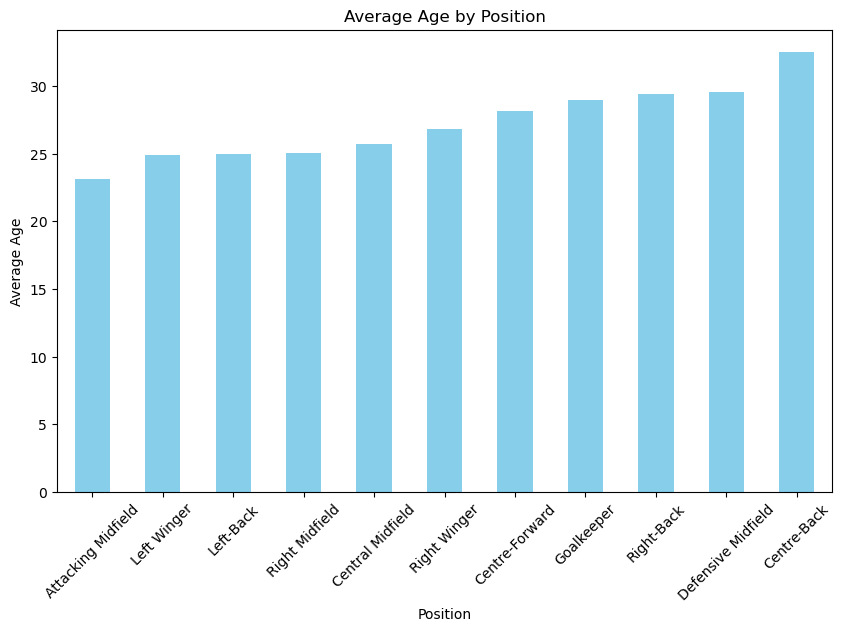

In [6]:
from datetime import datetime

# Ensure 'date_of_birth' is in datetime format
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')

# Calculate age
current_date = datetime.now()
df['age'] = (current_date - df['date_of_birth']).dt.days // 365

# Group by position and calculate average age
avg_age_position = df.groupby('position_x')['age'].mean()

# Visualization
avg_age_position.sort_values().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Average Age by Position")
plt.ylabel("Average Age")
plt.xlabel("Position")
plt.xticks(rotation=45)
plt.show()

#### Centre-Back has the highest average age among the player positions.
#### Defensive Midfield is the second highest.
#### Attacking Midfield has the lowest average age.

### Q2: Market Value by Nationality

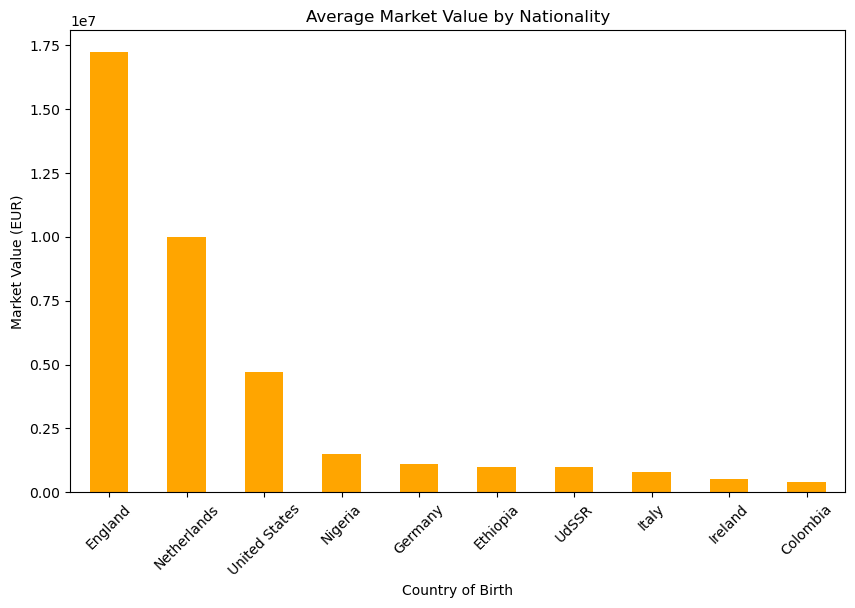

In [7]:
# Group by nationality and calculate average market value
market_value_nationality = df.groupby('country_of_birth')['market_value_in_eur'].mean().sort_values(ascending=False).head(10)

# Visualization
market_value_nationality.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Average Market Value by Nationality")
plt.ylabel("Market Value (EUR)")
plt.xlabel("Country of Birth")
plt.xticks(rotation=45)
plt.show()

#### England has the highest average market value among the top 10 nationalities.
#### The average market value decreases significantly after England, with Netherlands and United States having the next highest values.
#### The remaining nationalities (Nigeria, Germany, Ethiopia, USSR, Italy, Ireland, and Colombia) have considerably lower average market values.

### Q3: Most Common Positions by Country

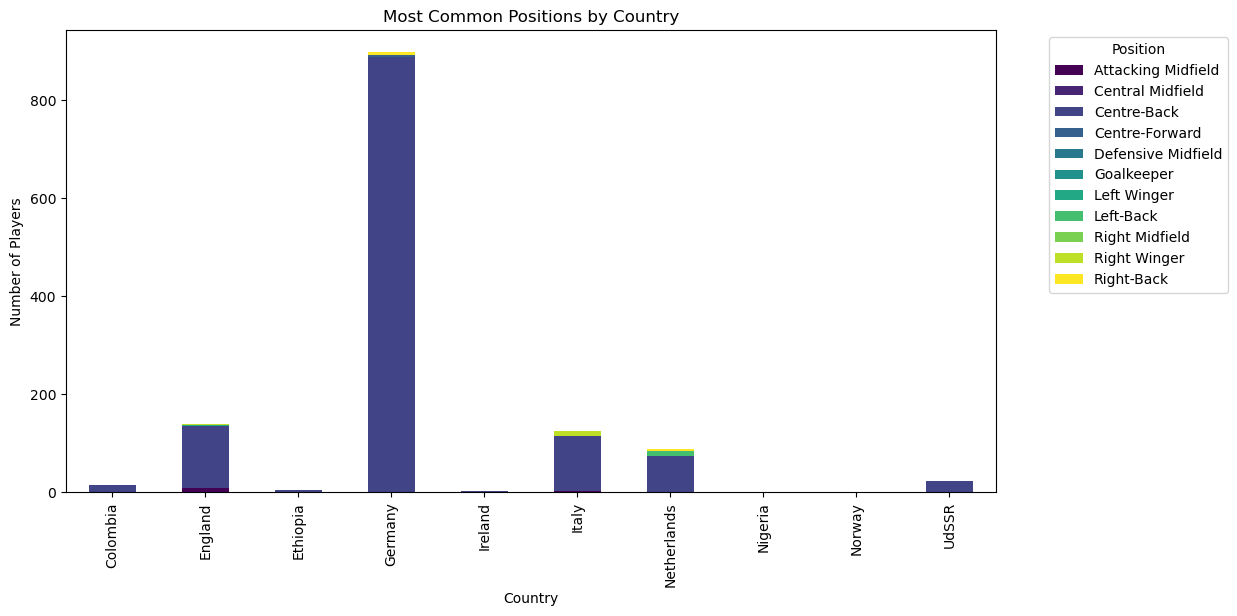

In [8]:
# Group by country and position to count occurrences
position_country = df.groupby(['country_of_birth', 'position_x']).size().unstack(fill_value=0)

# Visualization
position_country.head(10).plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Most Common Positions by Country")
plt.ylabel("Number of Players")
plt.xlabel("Country")
plt.legend(title="Position", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Germany has the highest number of players, with a significant number of players in various positions.
#### Netherlands also has a considerable number of players across different positions.
#### Other countries, such as England, Ireland, Italy, Nigeria, Norway, and USSR, have a smaller number of players in each position.

## K-Means Clustering: Player Attributes

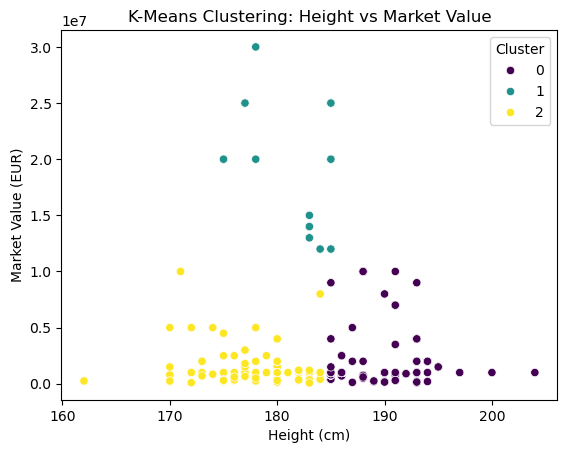

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Selecting relevant features
features = df[['height_in_cm', 'market_value_in_eur']].dropna()

# Standardizing data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
features['Cluster'] = clusters

# Visualization
sns.scatterplot(
    x=features['height_in_cm'],
    y=features['market_value_in_eur'],
    hue=features['Cluster'],
    palette='viridis'
)
plt.title("K-Means Clustering: Height vs Market Value")
plt.xlabel("Height (cm)")
plt.ylabel("Market Value (EUR)")
plt.show()

#### The K-Means clustering algorithm has grouped the players into three clusters based on their height and market value. The clusters reveal interesting patterns:

#### Cluster 0: This cluster likely represents players with average height and market value.
#### Cluster 1: This cluster likely represents players with both high height and high market value, suggesting that taller players tend to have higher market values.
#### Cluster 2: This cluster likely represents players with lower heights and lower market values.

## Descriptive analysis: Contract Management
### Q1: Average Contract Duration by Position

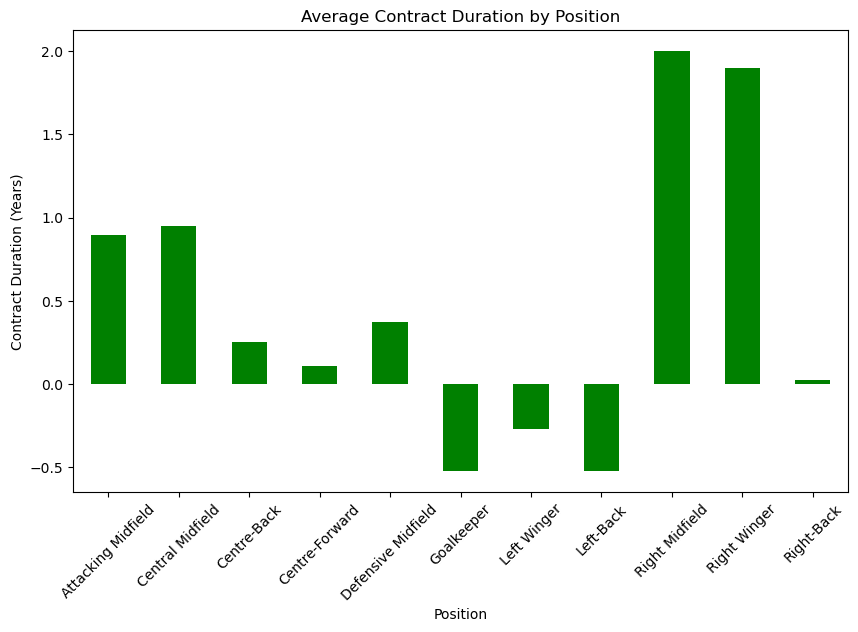

In [13]:
# Convert contract expiration to datetime and calculate duration
df['contract_expiration_date'] = pd.to_datetime(df['contract_expiration_date'])
df['contract_duration'] = (df['contract_expiration_date'] - pd.to_datetime('today')).dt.days / 365

# Group by position
avg_contract_duration = df.groupby('position_x')['contract_duration'].mean()

# Visualization
avg_contract_duration.plot(kind='bar', figsize=(10, 6), color='green')
plt.title("Average Contract Duration by Position")
plt.ylabel("Contract Duration (Years)")
plt.xlabel("Position")
plt.xticks(rotation=45)
plt.show()

#### Right Midfield has the longest average contract duration, with the bar extending significantly above the others.
#### Right Winger also has a relatively long average contract duration.
#### Goalkeeper and Left Winger have the shortest average contract durations, with the bars extending below the zero line.

### Q2: Market Value vs Contract Expiration

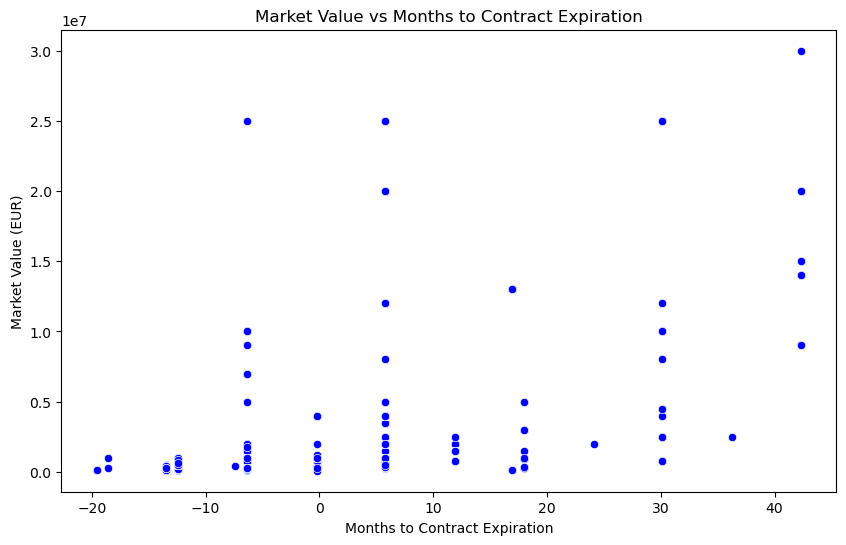

In [14]:
# Scatter plot for market value vs months to expiration
df['months_to_expiration'] = (df['contract_expiration_date'] - pd.to_datetime('today')).dt.days / 30

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='months_to_expiration', y='market_value_in_eur', data=df, color='blue')
plt.title("Market Value vs Months to Contract Expiration")
plt.xlabel("Months to Contract Expiration")
plt.ylabel("Market Value (EUR)")
plt.show()

#### There doesn't appear to be a strong or clear linear relationship between market value and months to contract expiration.
#### We observe a scattered distribution of points, indicating that market value is not solely determined by the time remaining on a player's contract.

### Q3: Distribution of Contract Expiration Years

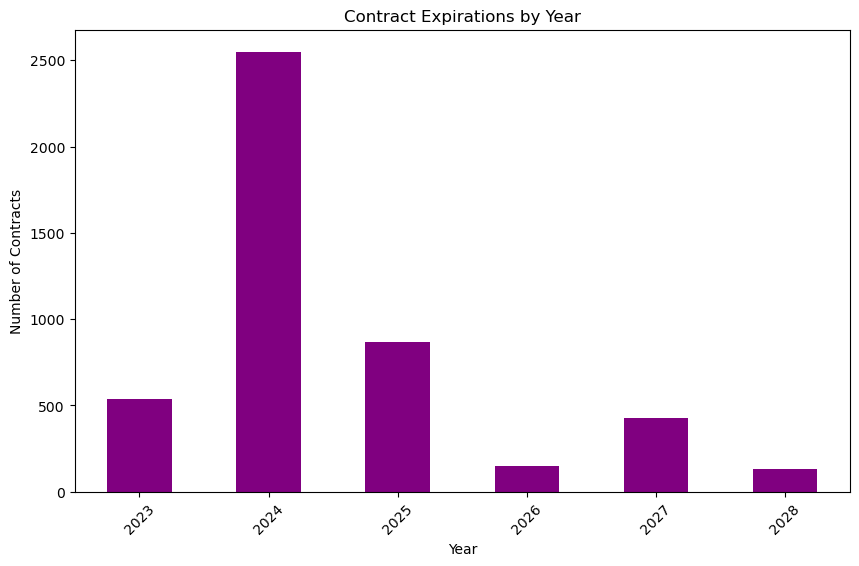

In [15]:
# Extract expiration year
df['expiration_year'] = df['contract_expiration_date'].dt.year

# Count contracts expiring each year
contract_expiration_counts = df['expiration_year'].value_counts().sort_index()

# Visualization
contract_expiration_counts.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title("Contract Expirations by Year")
plt.ylabel("Number of Contracts")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

#### 2024 has the highest number of contract expirations, with the bar reaching its peak.
#### 2023 has the second-highest number of contract expirations.
#### 2025, 2027, and 2028 have lower numbers of contract expirations.
#### 2026 has the lowest number of contract expirations.